# Get started with GRASS in Google Colab

Veronica Andreo  
2024-04-12

# What is Colab?

Perhaps you have heard of Google Colaboratory or simply Colab. This is a
hosted Jupyter Notebook service that requires no setup or configuration
to use and provides free access to computing resources, including GPUs
and TPUs. Colab is especially well suited to machine learning, data
science, and education. Furthermore, it allows easy sharing of workflows
which facilitates reproducibility.

Colab notebooks allow you to combine executable code and rich text in a
single document, along with images, HTML, LaTeX and more. When you
create your own Colab notebooks, they are stored in your Google Drive
account. You can easily share your Colab notebooks with co-workers or
friends, allowing them to comment on your notebooks or even edit them.

> **Note**
>
> See Colab’s FAQ for more details:
> <https://research.google.com/colaboratory/faq.html> and follow the
> Google Colab blog in Medium at <https://medium.com/google-colab>.

# Why GRASS in Colab?

Since Colab offers Jupyter notebooks in a Linux environment **it is
really easy to install or even compile GRASS there**. Also, because of
the integration with Google Drive, it is a great resource to run our
workflows in the cloud and export the results or keep our GRASS projects
and code there. This clearly facilitates teaching workshops or courses
since attendants do not need to install or download anything on their
own machines.

There are a couple of things to consider when working with GRASS within
Colab though. Users will need to *install GRASS every time they start a
new working session or notebook*. Furthermore, whatever files users
download within Colab *will last only during the current session*. If
the runtime gets disconnected because of inactivity, downloaded data and
outputs created within Colab, will be lost too. If users instead, mount
their own Google drive, download data and create their GRASS projects
there, those will be preserved even if the runtime is disconnected or
the session closed.

# Install GRASS in Colab

Start at <https://colab.research.google.com/> and create a new notebook.
Let’s first print system description to know where are we. The
exclamation mark is used for executing commands from the underlying
operating system:

In [1]:
!lsb_release -a

At the time of writing this tutorial, Colab has Linux [Ubuntu 22.04.4
LTS](https://medium.com/google-colab/colab-updated-to-ubuntu-22-04-lts-709a91555b3c).
So we add the ppa:ubuntugis repository, update and install GRASS. It
might take a couple of minutes according to the resources available.

In [2]:
!add-apt-repository -y ppa:ubuntugis/ubuntugis-unstable
!apt update
!apt-get install -y grass-core grass-dev

Check that GRASS is installed by asking which version is there.

In [3]:
!grass --version

To import the `grass.script` and `grass.jupyter` modules, you need to
tell Python where the GRASS Python package is:

In [4]:
# Import standard Python packages we need
import sys
import subprocess

# Ask GRASS where its Python packages are to be able to run it from the notebook
sys.path.append(
    subprocess.check_output(["grass", "--config", "python_path"], text=True).strip()
)

In [5]:
# Import the GRASS packages
import grass.script as gs
import grass.jupyter as gj

> **Note**
>
> By default we have access to the `/content` folder within Colab, and
> any data we create and download will be placed there. We can change
> that of course, it is just a Linux file system. In any case, we should
> bare in mind that whatever data we download within Colab, will
> disappear if the runtime gets disconected because of inactivity or
> once we close the Colab session.

# Create a new GRASS project

To create a new project we can use the `create_project` function from
the grass.script library. Let’s, for example, create a project with the
EPSG code 32617 (UTM zone 17N):

In [6]:
gs.create_project("nc_sentinel", epsg="32617")

Now we can start GRASS in the created project:

In [7]:
# Start GRASS in default project mapset
session = gj.init("nc_sentinel")

Now you can import data and start your analysis, following the [GRASS
and Python tutorial, part
A](fast_track_grass_and_python.qmd#a.-use-grass-tools-within-your-python-spatial-workflows).

# Start GRASS with a sample dataset

If you want to learn data analysis with GRASS, instead of creating a new
project from scratch, you can downlaod a ready-to-use sample dataset to
play with.

## Download sample data

Let’s get the North Carolina sample dataset into Colab to show a data
download workflow.

In [8]:
!wget -c https://grass.osgeo.org/sampledata/north_carolina/nc_basic_spm_grass7.zip -O nc.zip

We unzip the downloaded file in /content

In [9]:
!unzip nc.zip

and finally check it is indeed there:

In [10]:
import os

# List files and directories
os.listdir()

You should see *nc_basic_spm_grass7* sample dataset, which is a GRASS
project.

## Start GRASS

We have GRASS installed and a sample project to play around, so we are
ready to start GRASS within the North Carolina project.

In [11]:
# Start GRASS in default project mapset
session = gj.init("nc_basic_spm_grass7")

Just as an example, we will list the raster maps and display one of them
using the InteractiveMap class.

In [12]:
gs.list_grouped(type="raster")

In [13]:
m = gj.InteractiveMap()
m.add_raster("elevation")
m.show()

You can continue exploring the dataset in [GRASS and Python tutorial,
part
B](fast_track_grass_and_python.qmd#b.-use-python-tools-within-grass-workflows).

# Connect Colab with Google Drive

If we do not want to loose our GRASS projects when closing the Colab
notebook, we can connect Colab with our Google Drive and upload,
download or create our projects there. To be able to do any of that, we
need to mount our drive first (i.e., similar to what we do with external
drives). We first import the `drive` library.

In [14]:
from google.colab import drive 

Then, we define the mounting point. Running the cell below triggers a
dialog to grant Colab access to our drive. It is possible to change
accounts, too. Once that is complete, we will have access to everything
we have in our GDrive folders and we can browse the content either with
commands or from the left panel in the Colab notebook.

In [15]:
drive.mount("/content/drive")

We can also mount our drive directly from the Colab interface as shown
below:

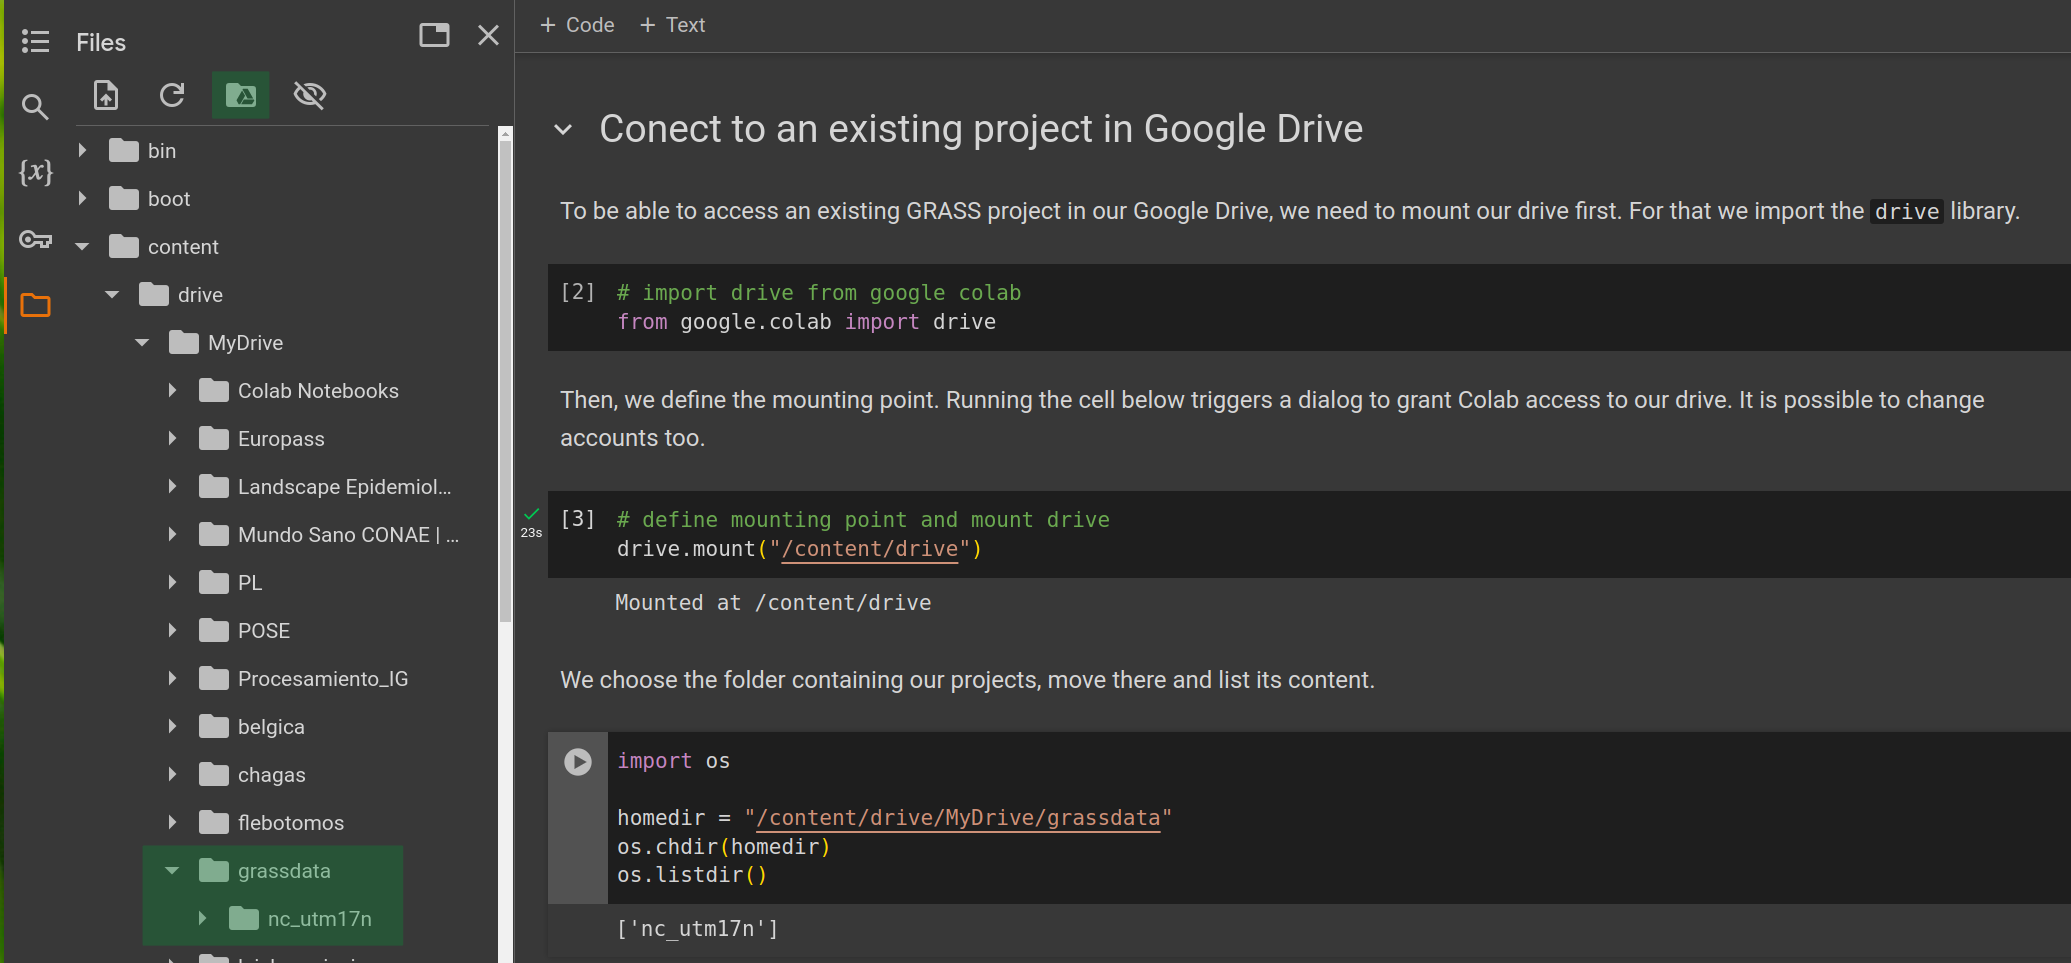

Once the GDrive is mounted, we can create a new project and start GRASS
there. To stay organized, GRASS projects are often saved under
`grassdata` folder.

In [16]:
gs.create_project("/content/drive/MyDrive/grassdata/nc_sentinel", epsg="32617")
gs.init("/content/drive/MyDrive/grassdata/nc_sentinel")

Importantly, we can then process and analyse our data so that our data
will remain in GDrive for the next time.

**Cool, ah?! Enjoy!**

------------------------------------------------------------------------

The development of this tutorial was funded by the US [National Science
Foundation (NSF)](https://www.nsf.gov/), award
[2303651](https://www.nsf.gov/awardsearch/showAward?AWD_ID=2303651).